<a href="https://colab.research.google.com/github/brempong21/Insurance/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest


In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/brempong21/Insurance/main/insurance.csv")


In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Bar chart to visulaize the distribution of individual based on their smoker status

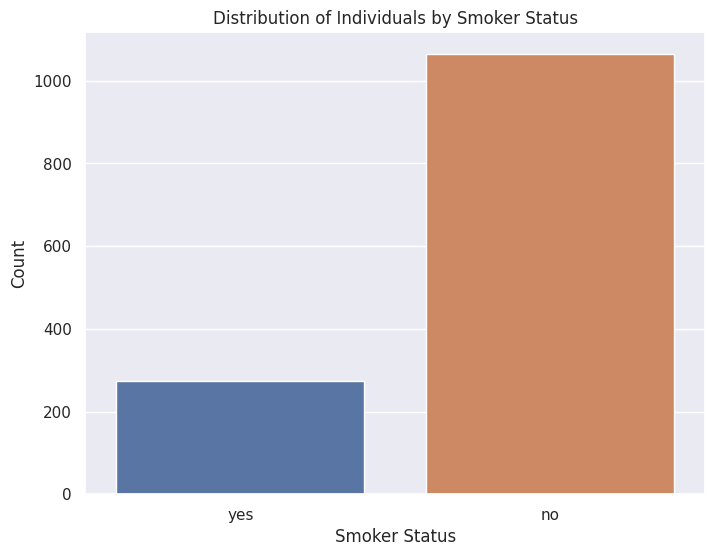

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="smoker")
plt.title("Distribution of Individuals by Smoker Status")
plt.xlabel("Smoker Status")
plt.ylabel("Count")
plt.show()

scatter plot to show the relationship between age and charges

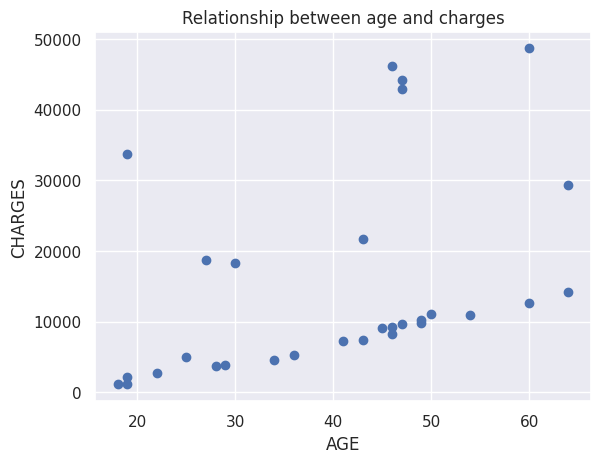

In [8]:
sample_df = df.sample(n=30,random_state=42)
plt.scatter(x='age',y='charges',data=sample_df)
plt.title("Relationship between age and charges")
plt.xlabel("AGE")
plt.ylabel("CHARGES")
plt.show()

Histogram to visualize the distribution of charges

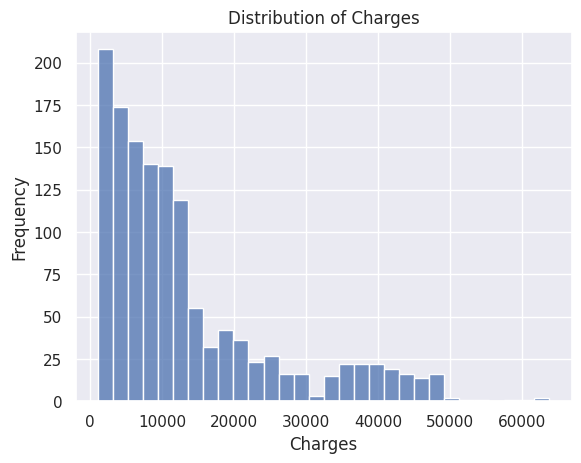

In [9]:
sns.histplot(df["charges"])
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

In [10]:
average_bmi = df['bmi'].mean()
print(f"The average BODY MASS INDEX(BMI) is: {round(average_bmi,2)}")

The average BODY MASS INDEX(BMI) is: 30.66


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
children_percentage = (df['children'].astype(bool).sum() / len(df)) * 100
print(f"Percentage with children: {round(children_percentage,2)}%")

Percentage with children: 57.1%


In [13]:
smoker_average_charges = df[df['smoker'] == 'yes']['charges'].mean()
print(f"Smokers average charges: GHS {round(smoker_average_charges,1)}")

non_smoker_average_charges = df[df['smoker'] == 'no']['charges'].mean()
print(f"Non Smokers average charges: GHS {round(non_smoker_average_charges,1)}")

Smokers average charges: GHS 32050.2
Non Smokers average charges: GHS 8434.3


In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
cat = df.select_dtypes(include=['object','category']).columns
num = [col for col in df.columns if col not in cat]
print(f"categorical columns: {cat}")
print(f"numerical colums: {num}")

categorical columns: Index(['sex', 'smoker', 'region'], dtype='object')
numerical colums: ['age', 'bmi', 'children', 'charges']


In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
for i in cat:
    df[i] = le.fit_transform(df[i])

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# MODELLING

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [19]:
X = df.drop('charges', axis = 1)
y = df['charges']

In [20]:
X.shape,y.shape

((1338, 6), (1338,))

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((936, 6), (402, 6), (936,), (402,))

In [23]:
import numpy as np
import random

random.seed(42)  
np.random.seed(42)  

models = {
    'Linear Regression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),  # Set random_state
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),  # Set random_state
    'SVR': SVR(kernel='rbf')
}

In [24]:
for key, value in models.items():
    value.fit(X_train, y_train)
    y_pred = value.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    print(f"\n{key}")
    print(f"\n R SQUARED: {round(r2, 2)}")
    print(f"\n MEAN ABSOLUTE ERROR: {round(MAE, 2)}")
    print(f"\nMEAN ABSOLUTE ERROR:{round(MAE,2)}")


Linear Regression

 R SQUARED: 0.77

 MEAN ABSOLUTE ERROR: 4155.24

MEAN ABSOLUTE ERROR:4155.24



RandomForestRegressor

 R SQUARED: 0.85

 MEAN ABSOLUTE ERROR: 2572.27

MEAN ABSOLUTE ERROR:2572.27

GradientBoostingRegressor

 R SQUARED: 0.87

 MEAN ABSOLUTE ERROR: 2432.9

MEAN ABSOLUTE ERROR:2432.9

DecisionTreeRegressor

 R SQUARED: 0.75

 MEAN ABSOLUTE ERROR: 2741.22

MEAN ABSOLUTE ERROR:2741.22

SVR

 R SQUARED: -0.08

 MEAN ABSOLUTE ERROR: 8230.11

MEAN ABSOLUTE ERROR:8230.11


In [25]:
me = {'Actual Value':y_test,'Predicted Values':y_pred}
comparison = pd.DataFrame(me)
print(f"{comparison}")

      Actual Value  Predicted Values
764     9095.06825       9505.682325
887     5272.17580       9456.193914
890    29330.98315       9594.987761
1293    9301.89355       9511.711463
259    33750.29180       9391.703147
...            ...               ...
701     9541.69555       9539.243206
672     4399.73100       9456.005836
1163    2200.83085       9388.800615
1103   11363.28320       9577.524241
1295    1964.78000       9393.888574

[402 rows x 2 columns]


# CONCLUSION
As smokers often have a particularly increased financial burden for health care compared to non-smokers, who typically have lower medical costs, raising fees may be one way to discourage smoking in our society.